In [1]:
import geopandas as gpd

In [7]:
bairros = gpd.read_file("../data/bairros_populacao_slz.zip")

<Axes: >

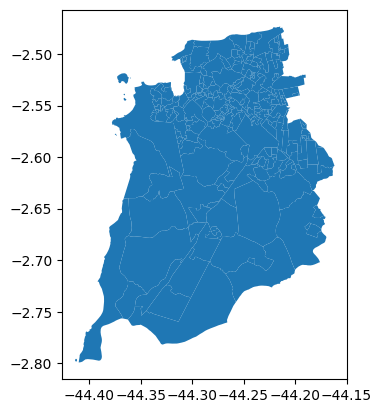

In [8]:
bairros.plot()

In [12]:
bairros.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

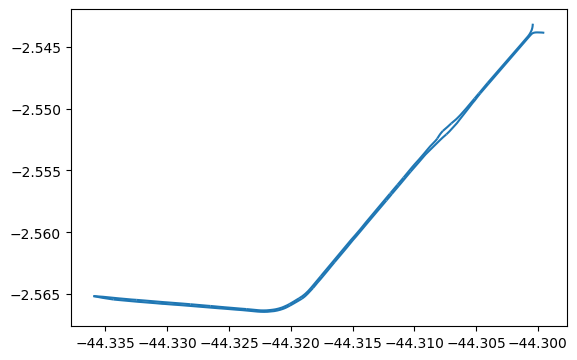

In [14]:
avenida = gpd.read_file("../data/avenida_portugueses.zip")
avenida.plot()

/tmp/ipykernel_65061/1893444157.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avenida.buffer(0.1).plot()


<Axes: >

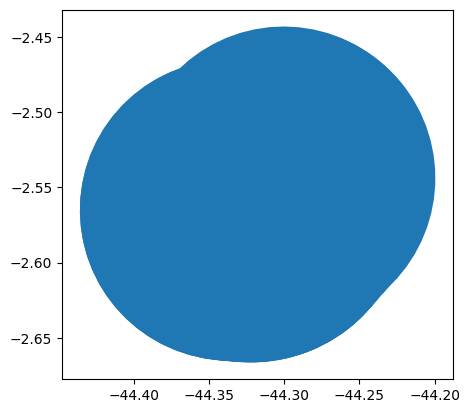

In [15]:
avenida.buffer(0.1).plot()

In [16]:
avenida.to_crs("EPSG:3857", inplace=True)

<Axes: >

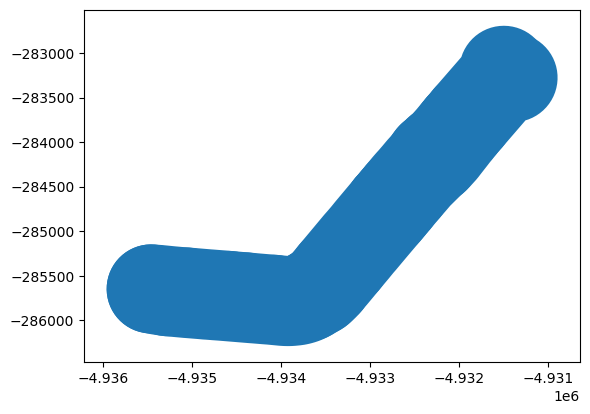

In [18]:
avenida.buffer(500).plot() # 500 metros

In [ ]:
import matplotlib.pyplot as plt

In [19]:
bairros.to_crs("EPSG:3857", inplace=True)

In [22]:
buffer_500m = avenida.buffer(500)

In [ ]:
buffer_500m.to_file("../data/buffer_portugueses_500m", driver='KML')

<Axes: >

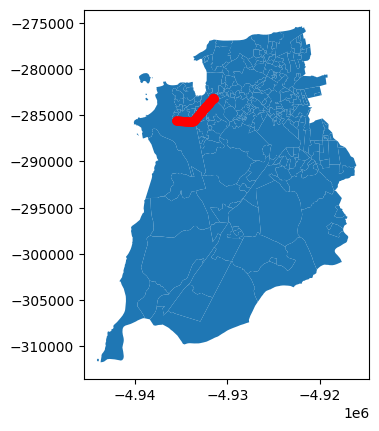

In [ ]:
ax = bairros.plot()
buffer_500m.plot(ax=ax, color="red") 


In [33]:
bairros_portugueses = bairros[bairros.geometry.intersects(buffer_500m.union_all())]

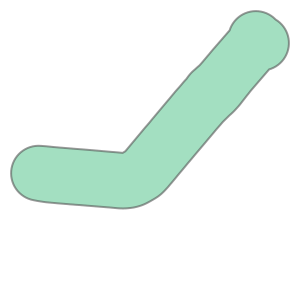

In [39]:
buffer_500m.union_all() # dissolve, mas retona apenas uma geometria

In [37]:
buffer_500m

0     POLYGON ((-4935292.595 -285169.926, -4935209.7...
1     POLYGON ((-4932267.931 -283397.151, -4931910.2...
2     POLYGON ((-4932277.746 -283408.529, -4932243.9...
3     POLYGON ((-4932470.587 -285126.085, -4932470.9...
4     POLYGON ((-4931592.577 -284131.483, -4931625.7...
5     POLYGON ((-4931975.936 -283044.026, -4931960.5...
6     POLYGON ((-4935147.941 -286177.141, -4935159.3...
7     POLYGON ((-4932526.895 -283684.281, -4932523.4...
8     POLYGON ((-4932749.118 -283914.782, -4932728.2...
9     POLYGON ((-4934646.889 -286217.241, -4934696.3...
10    POLYGON ((-4935175.937 -285185.596, -4935027.9...
11    POLYGON ((-4932610.566 -283816.01, -4932582.52...
12    POLYGON ((-4931931.388 -284485.635, -4931937.0...
13    POLYGON ((-4932909.4 -284119.978, -4932858.443...
14    POLYGON ((-4933559.848 -284890.855, -4933549.3...
15    POLYGON ((-4933877.885 -285248.406, -4933873.7...
16    POLYGON ((-4933842.754 -285229.423, -4933827.4...
17    POLYGON ((-4933880.763 -285271.74, -493384

<Axes: >

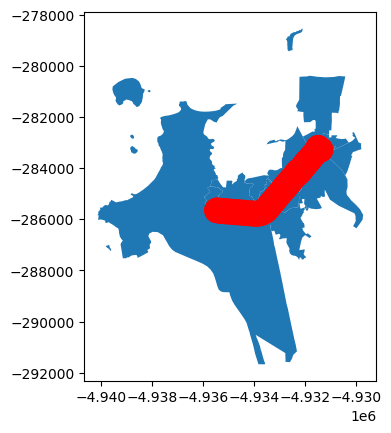

In [34]:

ax = bairros_portugueses.plot()
buffer_500m.plot(ax=ax, color="red") 

In [ ]:
bairros_portugueses.to_file("../data/bairros_selecionados.shp")

In [41]:
bairros_portugueses["2022POPULA"].sum()

np.float64(86005.0)